# Load Modules

In [104]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
import sklearn.impute._iterative as itimp
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm

# Load Data

In [105]:
df = pd.read_csv('all_mw_data_v4_phot.csv')
#df = df[df['var_flag']==1]
display(df['class'].value_counts())
#df = df[df['streak_src_flag']==0]
#df = df[df['pileup_flag']==0]
df =  df.reset_index(drop=True)
# df = df.replace({
#     'CV' : 'XRB' , 
#     'LMXB' : 'XRB' , 
#     'HMXB' : 'XRB' , 
#     'PULSAR' : 'XRB'
# })

# df = df.replace({
#   #  'CV' : 'XRB' , 
#     'LMXB' : 'XRB' , 
#     'HMXB' : 'XRB' , 
#   #  'PULSAR' : 'XRB'
# })

df = df.replace({
    'HMXB' : 'XRB' , 
    'LMXB' : 'XRB'
})

#df = df[df['class'].isin(['CV' , 'HMXB' , 'LMXB'])]



AGN       6133
STAR      2517
LMXB       386
CV         373
YSO        282
PULSAR     273
ULX        203
HMXB       169
Name: class, dtype: int64

Remove confused sources

In [106]:
conf_src = pd.read_csv('cat/confused_src.csv')
df = df[~df['name'].isin(conf_src['name'])]
df['class'].value_counts()

AGN       6125
STAR      2495
XRB        525
CV         359
YSO        282
PULSAR     266
ULX        195
Name: class, dtype: int64

In [107]:
df['class'].value_counts()

AGN       6125
STAR      2495
XRB        525
CV         359
YSO        282
PULSAR     266
ULX        195
Name: class, dtype: int64

In [108]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_available': 100-percent_missing})
missing_value_df = missing_value_df.sort_values('percent_available' , ascending=True)
#missing_value_df[missing_value_df['percent_available']>5]
#missing_value_df.to_csv('bands_sparsity.csv')

In [109]:
feat_to_use = [
 'hard_hm',
 'var_inter_hard_prob_hm',
 'var_inter_hard_sigma_hm',
 'hard_hs',
 'var_inter_hard_prob_hs',
 'hard_ms',
 'var_inter_hard_prob_ms',
 'var_intra_index_b',
 'var_intra_prob_b',
 'ks_intra_prob_b',
 'kp_intra_prob_b',
 'var_inter_index_b',
 'var_inter_prob_b',
 'var_inter_sigma_b',
 'gal_l2',
 'gal_b2'
 ]
feat_to_use = feat_to_use + [
    #'JK','JH' ,'HK','W1W4',
     #'W1W2','W1W3' , 'W2W3' ,'W2W4' , 'W3W4' , 
     '0.5-7 keV Chandra','1.2-2 keV Chandra','0.5-1.2 keV Chandra','0.2-0.5 keV Chandra','0.3-8 keV (Chandra)','0.5-2 keV (Chandra)' , '2-7 keV Chandra',
      #'2-10 keV (XMM)',,'1-2 keV (Chandra)'
     'FUV (GALEX) AB','NUV (GALEX) AB',
     'u (SDSS PSF) AB','g (SDSS PSF) AB','r (SDSS PSF) AB','i (SDSS PSF) AB','z (SDSS PSF) AB',
     'W1 (WISE)','W2 (WISE)','W3 (WISE)','W4 (WISE)',
     'J (2MASS/CTIO)','H (2MASS/CTIO)','K_s (2MASS/CTIO)',
     '4.5 microns (IRAC)','8.0 microns (IRAC)','24 microns (MIPS)','3.6 microns (IRAC)','5.8 microns (IRAC)',

 ]


In [110]:
df_small = df[feat_to_use]
percent_missing = df_small.isnull().sum() * 100 / len(df_small)
missing_value_df = pd.DataFrame({'column_name': df_small.columns,
                                 'percent_available': 100-percent_missing})
missing_value_df = missing_value_df.sort_values('percent_available' , ascending=True)
missing_value_df = missing_value_df[missing_value_df['percent_available']>40]
display(missing_value_df)
df_small = df_small[missing_value_df['column_name']]
df_small

,column_name,percent_available
K_s (2MASS/CTIO),K_s (2MASS/CTIO),41.943984
g (SDSS PSF) AB,g (SDSS PSF) AB,42.158681
var_inter_hard_prob_hs,var_inter_hard_prob_hs,42.675905
var_inter_hard_sigma_hm,var_inter_hard_sigma_hm,42.793013
var_inter_hard_prob_ms,var_inter_hard_prob_ms,43.485898
var_inter_hard_prob_hm,var_inter_hard_prob_hm,43.710354
var_inter_prob_b,var_inter_prob_b,47.135747
var_inter_index_b,var_inter_index_b,47.135747
var_inter_sigma_b,var_inter_sigma_b,47.135747
W1 (WISE),W1 (WISE),51.156436


,K_s (2MASS/CTIO),g (SDSS PSF) AB,var_inter_hard_prob_hs,var_inter_hard_sigma_hm,var_inter_hard_prob_ms,var_inter_hard_prob_hm,var_inter_prob_b,var_inter_index_b,var_inter_sigma_b,W1 (WISE),...,kp_intra_prob_b,ks_intra_prob_b,var_intra_prob_b,var_intra_index_b,1.2-2 keV Chandra,0.5-1.2 keV Chandra,0.2-0.5 keV Chandra,0.5-7 keV Chandra,gal_b2,gal_l2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.715476,0.628116,0.308857,0.0,3.169250e-14,4.521800e-15,2.870750e-14,6.011000e-14,-78.313068,39.570241
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.808309,0.491601,0.067012,0.0,1.202650e-13,6.936900e-14,1.530250e-13,3.394450e-13,-76.457962,353.944473
2,NaN,18.893000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.190000,...,0.923224,0.470301,0.487466,0.0,1.649750e-15,5.941550e-16,2.521750e-15,3.155000e-15,-47.088916,104.492204
3,NaN,19.615000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.383000,...,0.491822,0.199977,0.120281,0.0,1.483900e-14,4.466450e-15,2.698250e-14,4.516100e-14,-59.404999,97.142064
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.780803,0.764159,0.931290,6.0,2.008800e-14,2.266450e-14,4.666400e-14,8.675350e-14,-78.367846,39.921380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.231333,...,0.671619,0.779082,0.421113,0.0,1.575750e-14,2.288550e-15,1.937850e-14,3.310350e-14,-78.191434,39.748223
10332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.130000,...,0.813714,0.892656,0.780466,2.0,1.209370e-15,3.159800e-15,1.086450e-14,1.460450e-14,-78.188939,40.331770
10333,15.365,11.511333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.242333,...,0.465400,0.491806,0.216908,0.0,2.342650e-14,1.992150e-14,3.611050e-14,7.675750e-14,-68.677462,85.722092
10334,13.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.353000,...,0.243854,0.138291,0.305555,0.0,2.089350e-15,2.769350e-15,6.287300e-14,6.633600e-14,-71.187813,80.503683


In [113]:

feat_to_use
x = df_small[feat_to_use]
cols = x.columns.to_list()
print('RAW X')
print('-----------------------------------------')
display(x)
index = x.index.to_list()
info_col = ['name'	, 	'catalog' ,	'class' ,	'cat_name' , 'var_flag' , 	'streak_src_flag' ,	'pileup_flag' ,	'ra' , 	'dec']
id = df[info_col]
y = df['class']
scalar = StandardScaler()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer
from sklearn.preprocessing import Normalizer

from joblib import dump


from sklearn.ensemble import RandomForestRegressor
#imputer = IterativeImputer(RandomForestRegressor(n_estimators=30 , n_jobs=-1) )
imputer = IterativeImputer(RandomForestRegressor(n_estimators=30 , n_jobs=-1) )
imputer.fit(x)
x = pd.DataFrame(x , columns = cols)
x = imputer.transform(x)
print('-----------------------------------------')
print('after Imputation X')
dump(imputer , 'models/imputer.joblib')


#norm = Normalizer()
#scalar.fit(x)
#x = scalar.transform(x)
#x = pd.DataFrame(x , columns = cols)
print('-----------------------------------------')
print('after normalisation X')
#display(x)
dump(scalar , 'models/scalar.joblib')


x = pd.DataFrame(x , columns = cols)
eps = 1e-20
#flux_cols = ['flux_aper_b',	'flux_aper_lolim_b' ,	'flux_aper_hilim_b' , 	'flux_aper_h' , 	'flux_aper_lolim_h' , 	'flux_aper_hilim_h' , 	'flux_aper_m' , 	'flux_aper_lolim_m' , 	'flux_aper_hilim_m' , 	'flux_aper_s']
#x.loc[:, 'flux_aper_avg_b'] =  np.log10(x.loc[:, 'flux_aper_avg_b']+eps)
#x.loc[:, 'flux_aper_avg_hilim_b'] =  np.log10(x.loc[:, 'flux_aper_avg_hilim_b']+eps)
#x.loc[:, 'flux_aper_avg_lolim_b'] =  np.log10(x.loc[:, 'flux_aper_avg_lolim_b']+eps)
#x = x.replace(np.nan , 0 )
#for f in flux_cols:        
#    x.loc[: , f] = np.log10(x.loc[: , f]+eps)
#x = x.replace(np.nan , 0)
#x.insert(0 , 'csc_index' , index)
#x = x.set_index('csc_index')
x 

KeyError: "['z (SDSS PSF) AB', 'J (2MASS/CTIO)', '3.6 microns (IRAC)', 'FUV (GALEX) AB', 'r (SDSS PSF) AB', '8.0 microns (IRAC)', 'i (SDSS PSF) AB', '24 microns (MIPS)', 'H (2MASS/CTIO)', '5.8 microns (IRAC)', '0.5-2 keV (Chandra)', 'NUV (GALEX) AB', '4.5 microns (IRAC)', 'u (SDSS PSF) AB'] not in index"

In [112]:
x.columns.to_list()

['hard_hm',
 'var_inter_hard_prob_hm',
 'var_inter_hard_sigma_hm',
 'hard_hs',
 'var_inter_hard_prob_hs',
 'hard_ms',
 'var_inter_hard_prob_ms',
 'var_intra_index_b',
 'var_intra_prob_b',
 'ks_intra_prob_b',
 'kp_intra_prob_b',
 'var_inter_index_b',
 'var_inter_prob_b',
 'var_inter_sigma_b',
 'gal_l2',
 'gal_b2',
 '0.5-7 keV Chandra',
 '1.2-2 keV Chandra',
 '0.5-1.2 keV Chandra',
 '0.2-0.5 keV Chandra',
 '0.3-8 keV (Chandra)',
 '0.5-2 keV (Chandra)',
 '2-7 keV Chandra',
 'FUV (GALEX) AB',
 'NUV (GALEX) AB',
 'u (SDSS PSF) AB',
 'g (SDSS PSF) AB',
 'r (SDSS PSF) AB',
 'i (SDSS PSF) AB',
 'z (SDSS PSF) AB',
 'W1 (WISE)',
 'W2 (WISE)',
 'W3 (WISE)',
 'W4 (WISE)',
 'J (2MASS/CTIO)',
 'H (2MASS/CTIO)',
 'K_s (2MASS/CTIO)',
 '4.5 microns (IRAC)',
 '8.0 microns (IRAC)',
 '24 microns (MIPS)',
 '3.6 microns (IRAC)',
 '5.8 microns (IRAC)']

In [92]:
log_cols = [
    '0.5-7 keV Chandra',
    '1.2-2 keV Chandra',
    '0.5-1.2 keV Chandra',
    '0.2-0.5 keV Chandra',
    '0.3-8 keV (Chandra)',
    '0.5-2 keV (Chandra)',
    '4.5 microns (IRAC)',
    '8.0 microns (IRAC)',
    '24 microns (MIPS)',
    '3.6 microns (IRAC)',
    '5.8 microns (IRAC)',
    'i (SDSS PSF) AB',
     'K_s (2MASS/CTIO)',
     'FUV (GALEX) AB',
 'NUV (GALEX) AB',
'var_inter_sigma_b',
]

In [94]:
f = x.columns.to_list()
from tqdm import tqdm
for col_index in tqdm(range(len(f))):
    #col_index = 0
    plt.hist(x[f[col_index]] , color='k' , label='imputed')
    plt.hist(df[f[col_index]] , color='r' , label='all')
    plt.xlabel(f[col_index])
    plt.legend()
    if(f[col_index] in log_cols):
        print(f[col_index])
        plt.hist(np.log10(x[f[col_index]]) , color='k' , label='imputed')
        plt.hist(np.log10(df[f[col_index]]) , color='r' , label='all')
    plt.savefig('temp_plots/'+f[col_index].replace('/' , '')+'.jpg')
    plt.close()
    #plt.show()


 33%|███▎      | 14/42 [00:02<00:06,  4.38it/s]

var_inter_sigma_b


 40%|████      | 17/42 [00:03<00:05,  4.42it/s]

0.5-7 keV Chandra


 43%|████▎     | 18/42 [00:03<00:05,  4.45it/s]

1.2-2 keV Chandra
0.5-1.2 keV Chandra


 45%|████▌     | 19/42 [00:04<00:05,  4.20it/s]

0.2-0.5 keV Chandra


 48%|████▊     | 20/42 [00:04<00:05,  4.12it/s]

0.3-8 keV (Chandra)


 50%|█████     | 21/42 [00:04<00:05,  3.97it/s]/home/kumaran/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
 52%|█████▏    | 22/42 [00:04<00:04,  4.04it/s]

0.5-2 keV (Chandra)


 57%|█████▋    | 24/42 [00:05<00:04,  3.64it/s]

FUV (GALEX) AB


 60%|█████▉    | 25/42 [00:05<00:04,  3.81it/s]

NUV (GALEX) AB


 69%|██████▉   | 29/42 [00:06<00:02,  4.59it/s]

i (SDSS PSF) AB


 88%|████████▊ | 37/42 [00:07<00:00,  5.38it/s]

K_s (2MASS/CTIO)


 90%|█████████ | 38/42 [00:08<00:00,  4.98it/s]

4.5 microns (IRAC)


 93%|█████████▎| 39/42 [00:08<00:00,  4.88it/s]

8.0 microns (IRAC)


 95%|█████████▌| 40/42 [00:08<00:00,  4.21it/s]

24 microns (MIPS)
3.6 microns (IRAC)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]

5.8 microns (IRAC)


In [95]:
x['JH'] = x['J (2MASS/CTIO)'] - x['H (2MASS/CTIO)']
x['JK'] = x['J (2MASS/CTIO)'] - x['K_s (2MASS/CTIO)']
x['HK'] = x['H (2MASS/CTIO)'] - x['K_s (2MASS/CTIO)']
x['W1W4'] = x['W1 (WISE)'] - x['W4 (WISE)']
x['W1W2'] = x['W1 (WISE)'] - x['W2 (WISE)']
x['W1W3'] = x['W3 (WISE)'] - x['W1 (WISE)']
x['W2W4'] = x['W2 (WISE)'] - x['W4 (WISE)']
x['W2W3'] = x['W2 (WISE)'] - x['W3 (WISE)']
x['W3W4'] = x['W3 (WISE)'] - x['W4 (WISE)']

In [96]:
x = x.drop(columns = ['W1W2' , 'W1W3' , 'W2W3' , 'W2W4' , 'W1W4' , 'W3W4' , 'JK','HK'])

In [97]:
y.value_counts()

AGN       6125
STAR      2495
XRB        525
CV         359
YSO        282
PULSAR     266
ULX        195
Name: class, dtype: int64

In [98]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , stratify=y)
from imblearn.over_sampling import SMOTE , ADASYN , KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(k_neighbors=5)
y_train.value_counts()


AGN       4900
STAR      1996
XRB        420
CV         287
YSO        225
PULSAR     213
ULX        156
Name: class, dtype: int64

In [99]:
y_test.value_counts()

AGN       1225
STAR       499
XRB        105
CV          72
YSO         57
PULSAR      53
ULX         39
Name: class, dtype: int64

In [100]:
# under = RandomUnderSampler(sampling_strategy={
#     'AGN' : 2500 ,
#     'STAR' : 2500 ,
#     'LMXB': 909 , 
#     "CV" : 225,
#     "YSO" : 226 ,
#     "PULSAR" : 211 , 
#     "ULX" : 160 ,
#     "HMXB" : 118  
# })

# under = RandomUnderSampler(sampling_strategy={
#     'AGN' : 4000 , 
#     'STAR' : 1900 ,
#     'XRB' : 909 ,
#     'YSO' : 225 ,
#     'ULX' : 160
# })

#over = ADASYN()

#x_train_low , y_train_low = under.fit_resample(x_train , y_train)
#display(y_train_low.value_counts())
x_train_up , y_train_up = over.fit_resample(x_train , y_train)
y_train_up.value_counts()

YSO       4900
CV        4900
PULSAR    4900
ULX       4900
AGN       4900
STAR      4900
XRB       4900
Name: class, dtype: int64

In [102]:
clf = RandomForestClassifier(n_estimators=500 , n_jobs=-1)
clf.fit(x_train_up , y_train_up)
clf.score(x_test , y_test)

0.8682926829268293

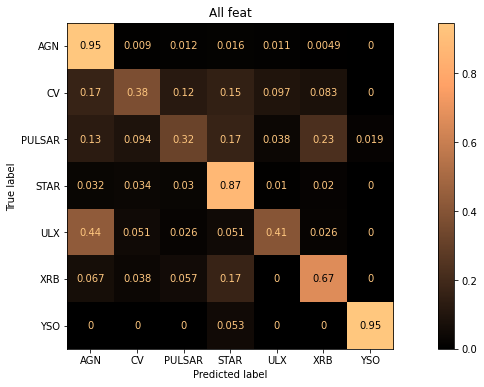

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig , ax = plt.subplots( nrows=1 ,ncols=1 , figsize=(16,6))
predictions = clf.predict(x_test)

cm = confusion_matrix(y_test, predictions, labels=clf.classes_ , normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_ , )
disp.plot(cmap  = plt.cm.copper , ax=ax)
plt.title('All feat')
plt.savefig('result/cf_all_feat-all-class.jpg')
plt.show()

In [602]:
from sklearn.metrics import precision_score , recall_score , accuracy_score

In [520]:

y_pred = clf.predict(x_test)
y_true = y_test 
prec = precision_score(y_true , y_pred , average = None  , labels = clf.classes_)
recall = recall_score(y_true , y_pred , average = None  , labels = clf.classes_)
df_res = pd.DataFrame({
    'band_rem' : ['wise']*len(prec) ,  
    'class' : clf.classes_ , 
    'precision': prec , 
    'recall' : recall , 
})
df_res.to_csv('result/score_wise.csv')
display(df_res)
#print(recall)
#acc = accuracy_score(y_true , y_pred)
#print(acc)

,band_rem,class,precision,recall
0,wise,AGN,0.917874,0.931373
1,wise,STAR,0.957447,0.888158
2,wise,ULX,0.470588,0.533333
3,wise,XRB,0.644860,0.793103
4,wise,YSO,1.000000,0.823529


In [351]:
pred_prob = clf.predict_proba(x_test)
prob_df = pd.DataFrame(
    pred_prob , columns = clf.classes_
)
prob_df.insert(0 , 'true class' , y_test.to_list())
prob_df.insert(1 , 'pred_class' , clf.predict(x_test))
#prob_df.to_csv('predicted_prob.csv')

In [104]:
pdf = prob_df.melt()
pdf 

,variable,value
0,true class,AGN
1,true class,AGN
2,true class,AGN
3,true class,AGN
4,true class,AGN
...,...,...
13939,YSO,0
13940,YSO,0.002
13941,YSO,0
13942,YSO,0.006


In [105]:
pred_cl = clf.predict(x_test)
pred_prob = [np.amax(el) for el in clf.predict_proba(x_test)]
prob_df_2 = pd.DataFrame({
    "pred_class" : pred_cl , 
    "pred_prob" : pred_prob
})


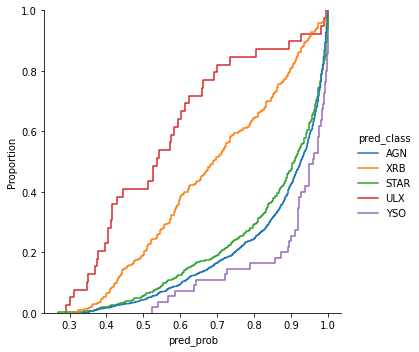

In [106]:
sns.displot(
    data = prob_df_2,
    x = 'pred_prob' , 
    hue = 'pred_class' , 
    kind = 'ecdf'
)
plt.show()

In [107]:
prob_df_2

,pred_class,pred_prob
0,AGN,0.832
1,AGN,0.717
2,AGN,0.990
3,AGN,0.984
4,AGN,0.912
...,...,...
1987,AGN,0.564
1988,AGN,0.870
1989,AGN,0.984
1990,STAR,0.964


In [108]:
prob_df

,true class,pred_class,AGN,STAR,ULX,XRB,YSO
0,AGN,AGN,0.832,0.054,0.060,0.054,0.000
1,AGN,AGN,0.717,0.008,0.249,0.024,0.002
2,AGN,AGN,0.990,0.004,0.004,0.002,0.000
3,AGN,AGN,0.984,0.004,0.006,0.006,0.000
4,AGN,AGN,0.912,0.028,0.006,0.052,0.002
...,...,...,...,...,...,...,...
1987,ULX,AGN,0.564,0.008,0.362,0.066,0.000
1988,AGN,AGN,0.870,0.028,0.032,0.068,0.002
1989,AGN,AGN,0.984,0.002,0.006,0.008,0.000
1990,STAR,STAR,0.010,0.964,0.000,0.020,0.006


In [109]:

prob_df.insert(0 , 'true_class' , y_test)
prob_df.insert(1 , 'pred_class' , clf.predict(x_test))
prob_df

ValueError: cannot insert pred_class, already exists

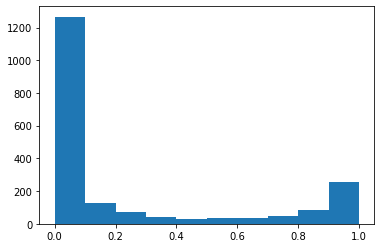

In [110]:
plt.hist(prob_df['STAR'])
plt.show()

In [111]:
feat_imp = clf.feature_importances_
feat_names = x_train.columns.to_list()
feat_imp_df = pd.DataFrame({
    "name" : feat_names , 
    "imp" :feat_imp
})
feat_imp_df = feat_imp_df.sort_values('imp' , ascending=False)
#feat_imp_df[:]['name'].to_list()
display(feat_imp_df)

,name,imp
15,gal_b2,0.126098
14,gal_l2,0.109961
32,H (2MASS/CTIO),0.065906
31,J (2MASS/CTIO),0.049791
23,W1 (WISE),0.043495
17,0.5-7 keV Chandra,0.039087
3,hard_hs,0.037770
33,K_s (2MASS/CTIO),0.032440
13,var_inter_sigma_b,0.029980
20,0.2-0.5 keV Chandra,0.029220
